<a href="https://colab.research.google.com/github/rhiats/Heart-Failure-Clinical-Records/blob/main/Heart_Failure_Clinical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Failure Clinical Records**

Replicate paper:

Chicco, D., & Jurman, G. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making, 20, 16. https://doi.org/10.1186/s12911-020-1023-5

Dataset:
Heart Failure Clinical Records [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd

**Load Data from UCI ML Repo**

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

In [4]:
df = pd.concat([X, y], axis=1)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Continuous Features EDA**

In [5]:
continuous_features_df = X[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
summary_continuous_full_sample_df = pd.DataFrame({
    'Median': continuous_features_df.median(),
    'Mean': round(continuous_features_df.mean(),2),
    'Standard Deviation': round(continuous_features_df.std(),2)
})

In [6]:
summary_continuous_full_sample_df

,Median,Mean,Standard Deviation
age,60.0,60.83,11.89
creatinine_phosphokinase,250.0,581.84,970.29
ejection_fraction,38.0,38.08,11.83
platelets,262000.0,263358.03,97804.24
serum_creatinine,1.1,1.39,1.03
serum_sodium,137.0,136.63,4.41
time,115.0,130.26,77.61


In [7]:
continuous_features_dead_df = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']][df['death_event']==1]

In [8]:
summary_continuous_dead_df = pd.DataFrame({
    'Median': continuous_features_dead_df.median(),
    'Mean': round(continuous_features_dead_df.mean(),2),
    'Standard Deviation': round(continuous_features_dead_df.std(),2)
})

In [9]:
summary_continuous_dead_df

,Median,Mean,Standard Deviation
age,65.0,65.22,13.21
creatinine_phosphokinase,259.0,670.20,1316.58
ejection_fraction,30.0,33.47,12.53
platelets,258500.0,256381.04,98525.68
serum_creatinine,1.3,1.84,1.47
serum_sodium,135.5,135.38,5.00
time,44.5,70.89,62.38


In [10]:
continuous_features_survived_df = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']][df['death_event']==0]

In [11]:
summary_continuous_survived_df = pd.DataFrame({
    'Median': continuous_features_survived_df.median(),
    'Mean': round(continuous_features_survived_df.mean(),2),
    'Standard Deviation': round(continuous_features_survived_df.std(),2)
})

In [12]:
summary_continuous_survived_df

,Median,Mean,Standard Deviation
age,60.0,58.76,10.64
creatinine_phosphokinase,245.0,540.05,753.80
ejection_fraction,38.0,40.27,10.86
platelets,263000.0,266657.49,97531.20
serum_creatinine,1.0,1.18,0.65
serum_sodium,137.0,137.22,3.98
time,172.0,158.34,67.74


In [13]:
'Full sample: {} individuals. Dead patients: {} individuals. Survived patients: {} individuals. σ: standard deviation'.format(len(df), len(continuous_features_dead_df), len(continuous_features_survived_df))

'Full sample: 299 individuals. Dead patients: 96 individuals. Survived patients: 203 individuals. σ: standard deviation'

**Categorical Features EDA**

- 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'

In [14]:
def categorical_features_eda(df, feature):
  """
    Count the number of events and non-events in a categroical feature and calculate the percentage of events and non-events.

    @param df: DataFrame contraining the feature
    @param feature: string feature name
    @return: DataFrame with the number of events and non-events and the percentage of events and non-events
  """
  calc_df = df[[feature,'age']].groupby(feature).count().reset_index().rename(columns={'age':'#'})
  calc_df['%']=round((calc_df['#']/calc_df['#'].sum())*100,2)

  print(calc_df)

In [15]:
categorical_features_list = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for feature in categorical_features_list:
  categorical_features_eda(df, feature)

   anaemia    #      %
0        0  170  56.86
1        1  129  43.14
   diabetes    #      %
0         0  174  58.19
1         1  125  41.81
   high_blood_pressure    #      %
0                    0  194  64.88
1                    1  105  35.12
   sex    #      %
0    0  105  35.12
1    1  194  64.88
   smoking    #      %
0        0  203  67.89
1        1   96  32.11


**Mann–Whitney U test**

In [16]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(df, feature):
  """
    Perform a Mann–Whitney U test on a continuous feature.

    @param df: DataFrame contraining the feature
    @param feature: string feature name
    @return: DataFrame with the Mann–Whitney U test results
  """

  # Example data: feature values for two groups (e.g., survived vs died)
  group_survived = df[df['death_event']==0][feature]
  group_died = df[df['death_event']==1][feature]

  # Perform Mann–Whitney U test
  stat, p_value = mannwhitneyu(group_survived, group_died, alternative='two-sided')

  #print(f"U statistic: {stat}")
  print(f"P-value: {p_value}")

  if p_value < 0.05:
      print("Reject the null hypothesis. There is a significant difference between the groups.")
  else:
      print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


In [17]:
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for feature in continuous_features:
  print(feature)
  mann_whitney_u_test(df, feature)
  print("\n")

age
P-value: 0.0001667518011391951
Reject the null hypothesis. There is a significant difference between the groups.


creatinine_phosphokinase
P-value: 0.6840400261440358
Fail to reject the null hypothesis. There is no significant difference between the groups.


ejection_fraction
P-value: 7.368249168477738e-07
Reject the null hypothesis. There is a significant difference between the groups.


platelets
P-value: 0.4255585098046608
Fail to reject the null hypothesis. There is no significant difference between the groups.


serum_creatinine
P-value: 1.5809979011834038e-10
Reject the null hypothesis. There is a significant difference between the groups.


serum_sodium
P-value: 0.00029275574637774727
Reject the null hypothesis. There is a significant difference between the groups.


time
P-value: 6.85219665413428e-21
Reject the null hypothesis. There is a significant difference between the groups.




**Pearson correlation coefficient**

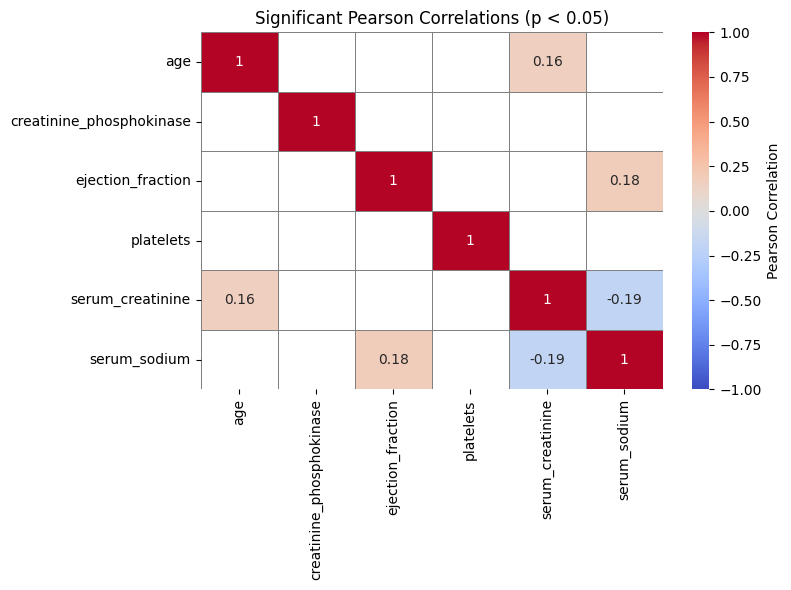

In [18]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

def corr_with_pvalues(df):
    cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
    corr_matrix = pd.DataFrame(index=cols, columns=cols)
    pval_matrix = pd.DataFrame(index=cols, columns=cols)

    for col1 in cols:
        for col2 in cols:
            r, p = pearsonr(df[col1], df[col2])
            corr_matrix.loc[col1, col2] = round(r, 3)
            pval_matrix.loc[col1, col2] = round(p, 5)

    return corr_matrix.astype(float), pval_matrix.astype(float)

corrs, pvals = corr_with_pvalues(df)

mask_significant = pvals < 0.05
masked_corrs = corrs.where(mask_significant)

# ---- 4. Plot heatmap ----
plt.figure(figsize=(8, 6))
sns.heatmap(
    masked_corrs,
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='gray',
    mask=~mask_significant,
    cbar_kws={'label': 'Pearson Correlation'}
)
plt.title('Significant Pearson Correlations (p < 0.05)')
plt.tight_layout()
plt.show()

**Scatterplot comparing Serum Creatine v. Ejection Fraction**

<Axes: xlabel='serum_creatinine', ylabel='ejection_fraction'>

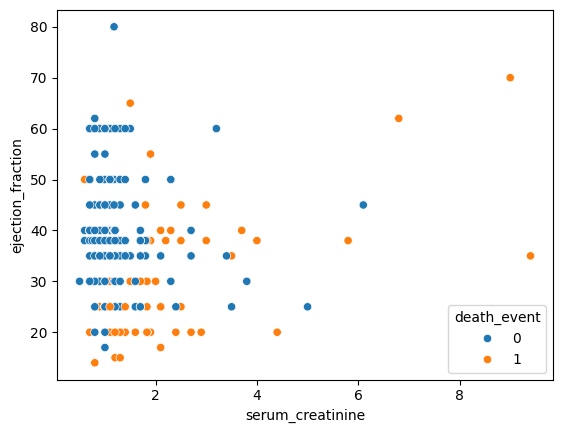

In [19]:
sns.scatterplot(data=df, x="serum_creatinine", y="ejection_fraction", hue="death_event")

**Survival Month v. Survival**

<Axes: xlabel='month'>

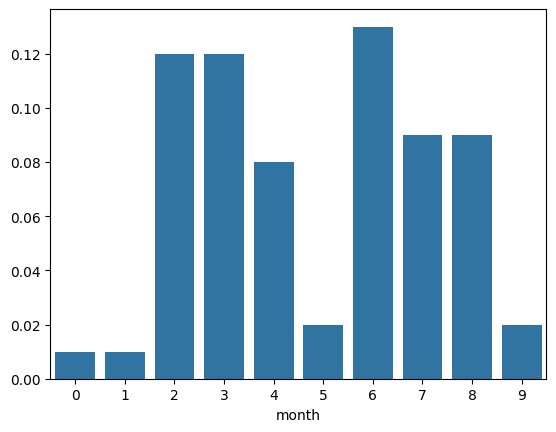

In [20]:
df['month'] = df['time']//30
df['month'] = df['month'].astype(int)
df_month_calc = round(df[df['death_event']==0]['month'].value_counts()/df.shape[0],2)

df_month_calc.reset_index().rename(columns={'index':'month', 'count':'%'})

sns.barplot(x=df_month_calc.index, y=df_month_calc.values)

**Survival Prediction on all Clinical Features**



1. Random Forests
2. Decision Tree
3. Gradient Boosting
4. One Rule
5. Artificial Neural Network
6. Naive Bayes
7. SVM Radial
8. SVM Linear
9. K-nearest Neighbor

Found Random Forest performed the best.

Paper run and average performance over 100 trials. I only ran 10 trials due to limited computing power.







In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

def evaluation_metrics(y_test, y_pred):
  """
    Evaluate the performance of a model.

    @param y_test: array of true labels
    @param y_pred: array of predicted labels
    @return: Evaluation metrics
  """

  mcc = matthews_corrcoef(y_test, y_pred)

  f1 = f1_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  recall_s = recall_score(y_test, y_pred)

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  tn_rate = tn/(tn+fp)

  precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
  pr_auc = auc(recall, precision)

  roc_auc = roc_auc_score(y_test, y_pred)

  return mcc, f1, accuracy, recall_s, tn_rate, pr_auc, roc_auc


In [22]:
def avg_evaluation_metrics(eval_arr):
  """
    Average of the evaluation metrics.

    @param eval_arr: array of evaluation metrics
    @return: Average of the evaluation metrics
  """
  return sum(eval_arr) / len(eval_arr)

In [23]:
#One Rule Implementation
class SimpleOneR:
    def fit(self, X, y):
        self.rules = {}
        best_feature = None
        best_accuracy = 0
        self.default_class = y['death_event'].mode()[0]

        for feature in X.columns:
            rules = {}
            for val in X[feature].unique():
              most_common_class = y[X[feature] == val]['death_event'].mode()[0]
              rules[val] = most_common_class

            preds = X[feature].map(rules)
            acc = accuracy_score(y, preds)

            if acc > best_accuracy:
                best_accuracy = acc
                best_feature = feature
                self.rules = rules

        self.best_feature = best_feature

    def predict(self, X):
        return X[self.best_feature].map(self.rules).fillna(self.default_class)

In [24]:
rf_mcc_arr = []
rf_f1_score_arr = []
rf_accuracy_arr = []
rf_tp_rate_arr = []
rf_tn_rate_arr = []
rf_pr_auc_arr = []
rf_pr_auc_arr = []
rf_roc_auc_arr = []


or_mcc_arr = []
or_f1_score_arr = []
or_accuracy_arr = []
or_tp_rate_arr = []
or_tn_rate_arr = []
or_pr_auc_arr = []
or_pr_auc_arr = []
or_roc_auc_arr = []

nb_mcc_arr = []
nb_f1_score_arr = []
nb_accuracy_arr = []
nb_tp_rate_arr = []
nb_tn_rate_arr = []
nb_pr_auc_arr = []
nb_pr_auc_arr = []
nb_roc_auc_arr = []

dt_mcc_arr = []
dt_f1_score_arr = []
dt_accuracy_arr = []
dt_tp_rate_arr = []
dt_tn_rate_arr = []
dt_pr_auc_arr = []
dt_pr_auc_arr = []
dt_roc_auc_arr = []

gb_mcc_arr = []
gb_f1_score_arr = []
gb_accuracy_arr = []
gb_tp_rate_arr = []
gb_tn_rate_arr = []
gb_pr_auc_arr = []
gb_pr_auc_arr = []
gb_roc_auc_arr = []

ann_mcc_arr = []
ann_f1_score_arr = []
ann_accuracy_arr = []
ann_tp_rate_arr = []
ann_tn_rate_arr = []
ann_pr_auc_arr = []
ann_pr_auc_arr = []
ann_roc_auc_arr = []


for i in range(1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
  X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mcc, f1, acc, recall, tn_rate, pr_auc, roc_auc = evaluation_metrics(y_test, y_pred)

  rf_mcc_arr.append(mcc)
  rf_f1_score_arr.append(f1)
  rf_accuracy_arr.append(acc)
  rf_tp_rate_arr.append(recall)
  rf_tn_rate_arr.append(tn_rate)
  rf_pr_auc_arr.append(pr_auc)
  rf_roc_auc_arr.append(roc_auc)

  model = SimpleOneR()
  model.fit(X_train, y_train)
  y_pred_one_rule = model.predict(X_test)

  mcc_or, f1_or, acc_or, recall_or, tn_rate_or, pr_auc_or, roc_auc_or = evaluation_metrics(y_test, y_pred_one_rule)

  or_mcc_arr.append(mcc_or)
  or_f1_score_arr.append(f1_or)
  or_accuracy_arr.append(acc_or)
  or_tp_rate_arr.append(recall_or)
  or_tn_rate_arr.append(tn_rate_or)
  or_pr_auc_arr.append(pr_auc_or)
  or_roc_auc_arr.append(roc_auc_or)

  gnb = GaussianNB()
  y_pred_gb = gnb.fit(X_train, y_train).predict(X_test)

  mcc_nb, f1_nb, acc_nb, recall_nb, tn_rate_nb, pr_auc_nb, roc_auc_nb = evaluation_metrics(y_test, y_pred_gb)

  nb_mcc_arr.append(mcc_nb)
  nb_f1_score_arr.append(f1_nb)
  nb_accuracy_arr.append(acc_nb)
  nb_tp_rate_arr.append(recall_nb)
  nb_tn_rate_arr.append(tn_rate_nb)
  nb_pr_auc_arr.append(pr_auc_nb)
  nb_roc_auc_arr.append(roc_auc_nb)

  dt = tree.DecisionTreeClassifier()
  y_pred_dt = dt.fit(X_train, y_train).predict(X_test)

  mcc_dt, f1_dt, acc_dt, recall_dt, tn_rate_dt, pr_auc_dt, roc_auc_dt = evaluation_metrics(y_test, y_pred_dt)

  dt_mcc_arr.append(mcc_dt)
  dt_f1_score_arr.append(f1_dt)
  dt_accuracy_arr.append(acc_dt)
  dt_tp_rate_arr.append(recall_dt)
  dt_tn_rate_arr.append(tn_rate_dt)
  dt_pr_auc_arr.append(pr_auc_dt)
  dt_roc_auc_arr.append(roc_auc_dt)

  mcc_scorer = make_scorer(matthews_corrcoef)

  gbc = GradientBoostingClassifier(random_state=42)
  param_grid = {
      'n_estimators': [50, 100],
      'learning_rate': [0.01, 0.1],
      'max_depth': [3, 5]
  }

  grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring=mcc_scorer, cv=5, n_jobs=-1, verbose=1)

  grid_search.fit(X_train, y_train)
  y_pred_gb = grid_search.predict(X_test)

  mcc_gb, f1_gb, acc_gb, recall_gb, tn_rate_gb, pr_auc_gb, roc_auc_gb = evaluation_metrics(y_test, y_pred_gb)

  gb_mcc_arr.append(mcc_gb)
  gb_f1_score_arr.append(f1_gb)
  gb_accuracy_arr.append(acc_gb)
  gb_tp_rate_arr.append(recall_gb)
  gb_tn_rate_arr.append(tn_rate_gb)
  gb_pr_auc_arr.append(pr_auc_gb)
  gb_roc_auc_arr.append(roc_auc_gb)

  ann = MLPClassifier(max_iter=500, random_state=42)

  param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
  }

  grid_search = GridSearchCV(estimator=ann, param_grid=param_grid, scoring=mcc_scorer, cv=5, n_jobs=-1, verbose=1)

  grid_search.fit(X_train, y_train)

  y_pred_ann = grid_search.predict(X_test)

  mcc_ann, f1_ann, acc_ann, recall_ann, tn_rate_ann, pr_auc_ann, roc_auc_ann = evaluation_metrics(y_test, y_pred_ann)

  ann_mcc_arr.append(mcc_ann)
  ann_f1_score_arr.append(f1_ann)
  ann_accuracy_arr.append(acc_ann)
  ann_tp_rate_arr.append(recall_ann)
  ann_tn_rate_arr.append(tn_rate_ann)
  ann_pr_auc_arr.append(pr_auc_ann)
  ann_roc_auc_arr.append(roc_auc_ann)





print("Random Forest")
print("Average MCC over 100 trials is:", avg_evaluation_metrics(rf_mcc_arr))
print("Average F1 score over 100 trials is:", avg_evaluation_metrics(rf_f1_score_arr))
print("Average accuracy over 100 trials is:", avg_evaluation_metrics(rf_accuracy_arr))
print("Average true positive rate over 100 trials is:", avg_evaluation_metrics(rf_tp_rate_arr))
print("Average true negative rate over 100 trials is:", avg_evaluation_metrics(rf_tn_rate_arr))
print("Average precision-recall AUC over 100 trials is:", avg_evaluation_metrics(rf_pr_auc_arr))
print("Average ROC AUC over 100 trials is:", avg_evaluation_metrics(rf_roc_auc_arr))
print("\n")


print("One Rule")
print("Average MCC over 100 trials is:", avg_evaluation_metrics(or_mcc_arr))
print("Average F1 score over 100 trials is:", avg_evaluation_metrics(or_f1_score_arr))
print("Average accuracy over 100 trials is:", avg_evaluation_metrics(or_accuracy_arr))
print("Average true positive rate over 100 trials is:", avg_evaluation_metrics(or_tp_rate_arr))
print("Average true negative rate over 100 trials is:", avg_evaluation_metrics(or_tn_rate_arr))
print("Average precision-recall AUC over 100 trials is:", avg_evaluation_metrics(or_pr_auc_arr))
print("Average ROC AUC over 100 trials is:", avg_evaluation_metrics(or_roc_auc_arr))
print("\n")

print("Naive Bayes")
print("Average MCC over 100 trials is:", avg_evaluation_metrics(nb_mcc_arr))
print("Average F1 score over 100 trials is:", avg_evaluation_metrics(nb_f1_score_arr))
print("Average accuracy over 100 trials is:", avg_evaluation_metrics(nb_accuracy_arr))
print("Average true positive rate over 100 trials is:", avg_evaluation_metrics(nb_tp_rate_arr))
print("Average true negative rate over 100 trials is:", avg_evaluation_metrics(nb_tn_rate_arr))
print("Average precision-recall AUC over 100 trials is:", avg_evaluation_metrics(nb_pr_auc_arr))
print("Average ROC AUC over 100 trials is:", avg_evaluation_metrics(nb_roc_auc_arr))
print("\n")

print("Decision Tree")
print("Average MCC over 100 trials is:", avg_evaluation_metrics(dt_mcc_arr))
print("Average F1 score over 100 trials is:", avg_evaluation_metrics(dt_f1_score_arr))
print("Average accuracy over 100 trials is:", avg_evaluation_metrics(dt_accuracy_arr))
print("Average true positive rate over 100 trials is:", avg_evaluation_metrics(dt_tp_rate_arr))
print("Average true negative rate over 100 trials is:", avg_evaluation_metrics(dt_tn_rate_arr))
print("Average precision-recall AUC over 100 trials is:", avg_evaluation_metrics(dt_pr_auc_arr))
print("Average ROC AUC over 100 trials is:", avg_evaluation_metrics(dt_roc_auc_arr))
print("\n")

print("Gradient Boosting")
print("Average MCC over 100 trials is:", avg_evaluation_metrics(gb_mcc_arr))
print("Average F1 score over 100 trials is:", avg_evaluation_metrics(gb_f1_score_arr))
print("Average accuracy over 100 trials is:", avg_evaluation_metrics(gb_accuracy_arr))
print("Average true positive rate over 100 trials is:", avg_evaluation_metrics(gb_tp_rate_arr))
print("Average true negative rate over 100 trials is:", avg_evaluation_metrics(gb_tn_rate_arr))
print("Average precision-recall AUC over 100 trials is:", avg_evaluation_metrics(gb_pr_auc_arr))
print("Average ROC AUC over 100 trials is:", avg_evaluation_metrics(gb_roc_auc_arr))
print("\n")

print("Artificial Neural Network")
print("Average MCC over 100 trials is:", avg_evaluation_metrics(ann_mcc_arr))
print("Average F1 score over 100 trials is:", avg_evaluation_metrics(ann_f1_score_arr))
print("Average accuracy over 100 trials is:", avg_evaluation_metrics(ann_accuracy_arr))
print("Average true positive rate over 100 trials is:", avg_evaluation_metrics(ann_tp_rate_arr))
print("Average true negative rate over 100 trials is:", avg_evaluation_metrics(ann_tn_rate_arr))
print("Average precision-recall AUC over 100 trials is:", avg_evaluation_metrics(ann_pr_auc_arr))
print("Average ROC AUC over 100 trials is:", avg_evaluation_metrics(ann_roc_auc_arr))
print("\n")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest
Average MCC over 100 trials is: 0.49289539864130866
Average F1 score over 100 trials is: 0.6153846153846154
Average accuracy over 100 trials is: 0.75
Average true positive rate over 100 trials is: 0.48
Average true negative rate over 100 trials is: 0.9428571428571428
Average precision-recall AUC over 100 trials is: 0.776904761904762
Average ROC AUC over 100 trials is: 0.7114285714285714


One Rule
Average MCC over 100 trials is: 0.16574838603294895
Average F1 score over 100 trials is: 0.30303030303030304
Average accuracy over 100 trials is: 0.6166666666666667
Average true positive rate over 100 trials is: 0.2
Average true negative rate over 100 trials is: 0.9142857142857143
Average precision-recall AUC over 100 trials is: 0.5791666666666667
Average ROC AUC over 100 trials is: 0.557142857142857


Naive Bayes
Average MCC over 100 trials is: 0.3858757306599165
Average F1 score over 100 trials is: 0.5
Average accuracy over 100 trials is: 0.7
Average true positive rate over 10

In [25]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


**SHAP**

In [26]:
!pip install shap

PermutationExplainer explainer: 61it [00:20,  1.85it/s]


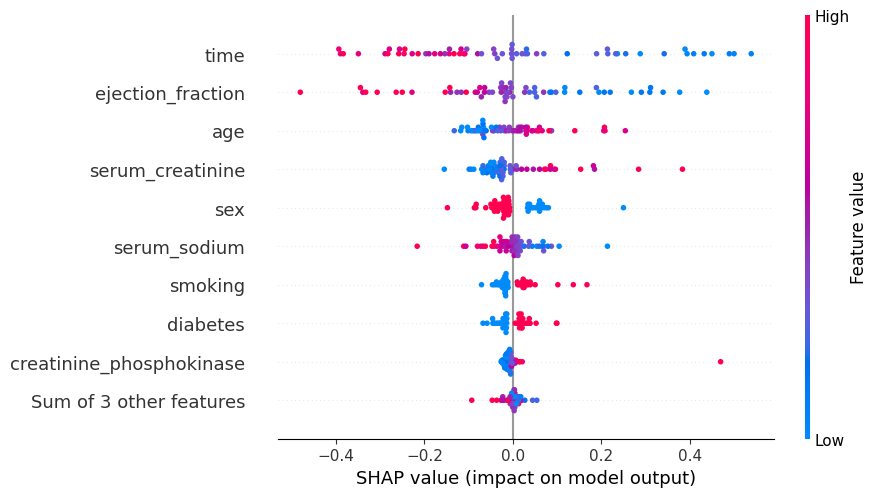

In [27]:
import shap

explainer = shap.Explainer(grid_search.predict, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

**Dashboard**